In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.labelsize'] = 14
mpl.rcParams['axes.linewidth'] = 1.2
mpl.rcParams['font.sans-serif'] = 'Helvetica'
mpl.rcParams['xtick.labelsize'] = 12
mpl.rcParams['ytick.labelsize'] = 12
mpl.rcParams['xtick.major.width'] = 1.2
mpl.rcParams['ytick.major.width'] = 1.2
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['figure.titlesize']= 14
mpl.rcParams['legend.fontsize']=12
mpl.rcParams['legend.title_fontsize']=14

In [4]:
with open('orf8ko_noAlpha_clusters_koType_metadata.tsv', 'r') as f:
    df = pd.read_csv(f, sep='\t')

In [5]:
df.columns

Index(['strain', 'cluster', 'gisaid_epi_isl', 'date', 'region', 'country',
       'division', 'location', 'length', 'age', 'sex', 'Nextstrain_clade',
       'pango_lineage', 'GISAID_clade', 'originating_lab', 'submitting_lab',
       'authors', 'url', 'missing_data', 'divergence', 'nonACGTN', 'coverage',
       'rare_mutations', 'reversion_mutations', 'potential_contaminants',
       'QC_missing_data', 'QC_mixed_sites', 'QC_rare_mutations',
       'QC_snp_clusters', 'QC_frame_shifts', 'QC_stop_codons',
       'QC_overall_score', 'QC_overall_status', 'ORF8_deletions', 'ORF8_gaps',
       'ORF8_nDeleted', 'ORF8_maxDeletion', 'ORF8_maxGap', 'ORF8_frameShifts',
       'ORF8_proteinLength', 'ORF8_stop', 'ORF8_stoploss', 'ORF8_misStops',
       'ORF8_ko', 'ORF8_koType'],
      dtype='object')

In [6]:
maxClust = max(df.cluster)

In [7]:
fsClusters = df.loc[df.ORF8_koType=='earlyStop:FrameShift','cluster'].unique()

for cluster in fsClusters:
    filt = df[df.cluster==cluster]
    values,counts = np.unique(filt.ORF8_stop, return_counts=True)
    if len(values) > 1:
        print(cluster)
        print(values)
        print(counts)

1461
['17:Q>*' '26:Q>*']
[2 2]
1384
['105:E>*' '18:E>*']
[23  1]
1381
['83:L>*' '95:G>*']
[9 1]
1345
['105:E>*' '17:Q>*' '30:Y>*']
[ 1 68  1]


I'm going to manually edit the code to deal with the above.


In [8]:
df.loc[(df.cluster==1461) & (df.ORF8_stop == '26:Q>*'),:].index

Int64Index([414, 415], dtype='int64')

In [9]:
df.loc[414:415,'cluster'] = maxClust + 1

In [10]:
df.loc[(df.cluster==1384) & (df.ORF8_stop == '18:E>*'),:].index

Int64Index([650], dtype='int64')

In [11]:
df.loc[650,'cluster'] = maxClust + 2

In [12]:
df.loc[(df.cluster==1381) & (df.ORF8_stop == '95:G>*'),:].index

Int64Index([658], dtype='int64')

In [13]:
df.loc[658,'cluster'] = maxClust + 3

In [14]:
df.loc[(df.cluster==1345) & (df.ORF8_stop == '105:E>*'),:].index

Int64Index([962], dtype='int64')

In [15]:
df.loc[962,'cluster'] = maxClust + 4

In [16]:
df.loc[(df.cluster==1345) & (df.ORF8_stop == '30:Y>*'),:].index

Int64Index([965], dtype='int64')

In [17]:
df.loc[965,'cluster'] = maxClust + 5

Now, let's check if it's fixed?

In [18]:
fsClusters = df.loc[df.ORF8_koType=='earlyStop:FrameShift','cluster'].unique()

for cluster in fsClusters:
    filt = df[df.cluster==cluster]
    values,counts = np.unique(filt.ORF8_stop, return_counts=True)
    if len(values) > 1:
        print(cluster)
        print(values)
        print(counts)

Whooo!! It's fixed!!

In [19]:
values,counts = np.unique(df.cluster,return_counts=True)
print(max(counts))

638


Text(0, 0.5, 'Number of clusters')

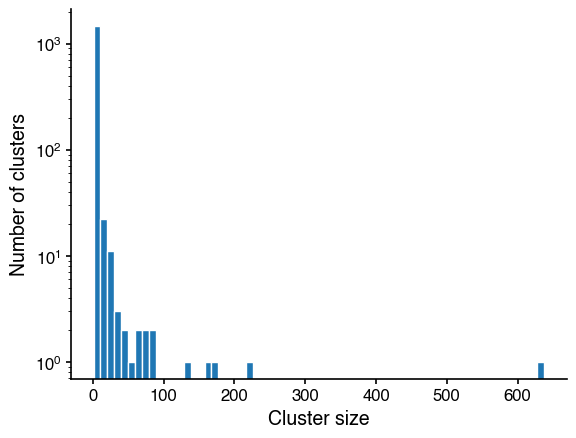

In [20]:
fig,ax = plt.subplots()
ax.hist(counts, bins=65,align='mid',ec='white')
ax.set_yscale('log')
ax.set_xlabel('Cluster size')
ax.set_ylabel('Number of clusters')

In [21]:
len(counts[counts>1])

428

In [22]:
len(counts[counts==1])

1090

How many non-singleton clusters that contain at least one WA sequence?

In [23]:
inWA = []
for clust in values:
    divs = df.loc[df.cluster==clust,:]['division']
    if 'Washington' not in divs.values:
        #print(clust)
        pass
    else:
        inWA.append(clust)
        
inWA = np.asarray(inWA)
countsInWA = counts[inWA-1]

In [24]:
len(countsInWA)

1255

In [25]:
len(countsInWA[countsInWA>1])

401

In [26]:
len(countsInWA[countsInWA==1])

854

In [27]:
len(df.loc[(df.cluster.isin(inWA[countsInWA>1])) &(df.division=="Washington"),:])

3574

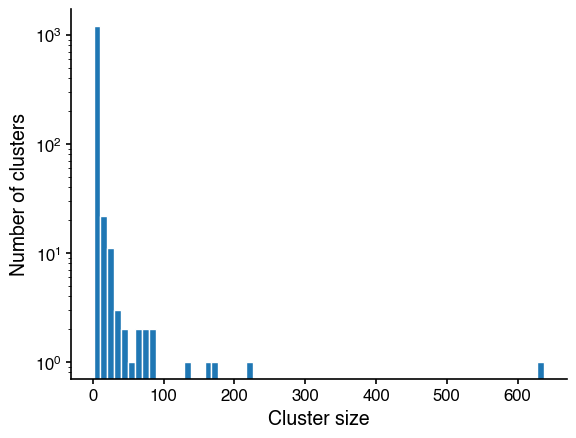

In [28]:
fig,ax = plt.subplots()
ax.hist(countsInWA, bins=65,align='mid',ec='white')
ax.set_yscale('log')
ax.set_xlabel('Cluster size')
ax.set_ylabel('Number of clusters')
#fig.savefig("clusters_hist.pdf",bbox_inches='tight',dpi=300)


In [29]:
withUW = []
for clust in values:
    lab = df.loc[(df.cluster==clust) & (df.division=='Washington'),:]['submitting_lab']
    if 'UW Virology Lab' not in lab.values:
        #print(clust)
        pass
    else:
        withUW.append(clust)
        
withUW = np.asarray(withUW)
countsWithUW = counts[withUW-1]

In [30]:
len(countsWithUW)

319

In [31]:
len(countsWithUW[countsWithUW>10])

43

Fix location formatting:

In [32]:
df['ORF8_deletions'] = df['ORF8_deletions'].str.replace(",\s+(?=[^\(]*\))",':', regex=True)
df['ORF8_deletions'] = df['ORF8_deletions'].str.replace('[\[\]()]', '', regex=True)

In [71]:
ko_type = []
minDel = []
minDelSize = []
for clust in inWA[countsInWA>1]:
    filt = df[df.cluster==clust]
    locs = filt.ORF8_deletions.str.replace(',',':')
    cStart = 0
    cEnd = 29903
    for loc in locs:
        if len(loc):
            split = loc.split(':')
            asInt = [int(v) for v in split]
            sizes = asInt - np.roll(asInt,1)
            realSizes = [sizes[index] for index in range(1, len(sizes), 2)]
            biggest = np.argmax(realSizes)
            start = int(split[biggest*2])
            end = int(split[(biggest*2)+1])
            if end - start >= 30:
                if start < end and end > start
                    cStart = start
                if end < cEnd:
                    cEnd = end
    minDel.append(str(cStart)+':'+str(cEnd))
    minDelSize.append(cEnd-cStart)
    ko_type.append(filt['ORF8_koType'].unique()[0])
    
inWAClusters= pd.DataFrame({'cluster': inWA[countsInWA>1], 'clusterSize': countsInWA[countsInWA>1],'koType':ko_type,'minDeletionLocation':minDel,'minDeletionSize':minDelSize})

In [33]:
ko_type = []
minDel = []
minDelSize = []
for clust in inWA[countsInWA>1]:
    filt = df[df.cluster==clust]
    locs = filt.ORF8_deletions.str.replace(',',':')
    cStart = 0
    cEnd = 29903
    for loc in locs:
        if len(loc):
            split = loc.split(':')
            asInt = [int(v) for v in split]
            sizes = asInt - np.roll(asInt,1)
            realSizes = [sizes[index] for index in range(1, len(sizes), 2)]
            biggest = np.argmax(realSizes)
            start = int(split[biggest*2])
            end = int(split[(biggest*2)+1])
            if end - start >= 30:
                if start < end and end > start:
                    cStart = max(cStart,start)
                    cEnd = min(cEnd,end)
                    if cEnd - cStart 
    minDel.append(str(cStart)+':'+str(cEnd))
    minDelSize.append(cEnd-cStart)
    ko_type.append(filt['ORF8_koType'].unique()[0])
    
inWAClusters= pd.DataFrame({'cluster': inWA[countsInWA>1], 'clusterSize': countsInWA[countsInWA>1],'koType':ko_type,'minDeletionLocation':minDel,'minDeletionSize':minDelSize})

In [34]:
inWAClusters

,cluster,clusterSize,koType,minDeletionLocation,minDeletionSize
0,1,2,BigDeletion,28160:28378,218
1,16,2,BigDeletion,27527:28088,561
2,17,2,BigDeletion,28053:28104,51
3,21,2,BigDeletion,27527:28088,561
4,25,3,BigDeletion,27872:28699,827
...,...,...,...,...,...
396,1495,2,earlyStop:FrameShift,0:29903,29903
397,1501,2,earlyStop:FrameShift,0:29903,29903
398,1507,4,earlyStop:FrameShift,0:29903,29903
399,1513,2,earlyStop:FrameShift,0:29903,29903


Is there any evidence that big deletion clusters should be split?

In [1]:
susClust = []
sizes = []
delClusters = inWAClusters.loc[inWAClusters.koType=='BigDeletion','cluster']
for idx in delClusters.index:
    if inWAClusters.loc[idx,'minDeletionSize'] < 30:
        susClust.append(inWAClusters.loc[idx,'cluster'])
        sizes.append(inWAClusters.loc[idx,'minDeletionSize'])
print(susClust)

NameError: name 'inWAClusters' is not defined

In [34]:
df.columns

Index(['strain', 'cluster', 'gisaid_epi_isl', 'date', 'region', 'country',
       'division', 'location', 'length', 'age', 'sex', 'Nextstrain_clade',
       'pango_lineage', 'GISAID_clade', 'originating_lab', 'submitting_lab',
       'authors', 'url', 'missing_data', 'divergence', 'nonACGTN', 'coverage',
       'rare_mutations', 'reversion_mutations', 'potential_contaminants',
       'QC_missing_data', 'QC_mixed_sites', 'QC_rare_mutations',
       'QC_snp_clusters', 'QC_frame_shifts', 'QC_stop_codons',
       'QC_overall_score', 'QC_overall_status', 'ORF8_deletions', 'ORF8_gaps',
       'ORF8_nDeleted', 'ORF8_maxDeletion', 'ORF8_maxGap', 'ORF8_frameShifts',
       'ORF8_proteinLength', 'ORF8_stop', 'ORF8_stoploss', 'ORF8_misStops',
       'ORF8_ko', 'ORF8_koType'],
      dtype='object')

In [64]:
sequences = []
gisaid = []
ko_type = []
delLocs = []
minDel = []
minDelSize = []
for clust in withUW[countsWithUW>1]:
    filt = df.loc[(df.submitting_lab=='UW Virology Lab') & (df.cluster==clust),:]
    locs = filt.ORF8_deletions.str.replace(',',':')
    cStart = 0
    cEnd = 29903
    for loc in locs:
        if len(loc):
            split = loc.split(':')
            asInt = [int(v) for v in split]
            sizes = asInt - np.roll(asInt,1)
            realSizes = [sizes[index] for index in range(1, len(sizes), 2)]
            biggest = np.argmax(realSizes)
            start = int(split[biggest+biggest])
            end = int(split[biggest+biggest+1])
            if start > cStart:
                cStart = start
            if end < cEnd:
                cEnd = end
    minDel.append(str(cStart)+':'+str(cEnd))
    minDelSize.append(cEnd-cStart)
    ko_type.append(filt['ORF8_koType'].unique()[0])

In [65]:
allUW = pd.DataFrame({'cluster': withUW[countsWithUW>1], 'clusterSize': countsWithUW[countsWithUW>1],'koType':ko_type,'minDeletionLocation':minDel,'minDeletionSize':minDelSize})

UWtoConfirm = allUW.loc[allUW.koType=='BigDeletion',:].merge(df.loc[(df.submitting_lab=='UW Virology Lab'),('cluster','strain','gisaid_epi_isl', 'ORF8_deletions')],on='cluster',how='left')
UWtoConfirm.sort_values(by='clusterSize',ascending=False,inplace=True,ignore_index=True)
UWFinal = UWtoConfirm.rename(columns={'strain':'UWstrain','gisaid_epi_isl':'GISAIDid'})

In [66]:
largest = []
for deletion in UWFinal['ORF8_deletions']:
    windows = deletion.split(', ')
    length = 0
    loc = None
    for i, window in enumerate(windows):
        start, end = window.split(':')
        size = int(end) - int(start)
        if size > length:
            length=size
            loc = i
    largest.append(windows[loc])
UWFinal['DeletionLocation'] = largest
UWFinal = UWFinal.drop(columns='ORF8_deletions')

In [67]:
UWFinal

,cluster,clusterSize,koType,minDeletionLocation,minDeletionSize,UWstrain,GISAIDid,DeletionLocation
0,719,638,BigDeletion,27995:27924,-71,USA/WA-UW-22010815153/2022,EPI_ISL_9594925,27845:28088
1,719,638,BigDeletion,27995:27924,-71,USA/WA-CDC-UW22010836326/2022,EPI_ISL_8986413,27836:28088
2,719,638,BigDeletion,27995:27924,-71,USA/WA-CDC-UW22010838456/2022,EPI_ISL_9154960,27845:27984
3,719,638,BigDeletion,27995:27924,-71,USA/WA-CDC-UW22010838553/2022,EPI_ISL_9275451,27845:28088
4,719,638,BigDeletion,27995:27924,-71,USA/WA-CDC-UW22010843196/2022,EPI_ISL_9275499,27849:28082
...,...,...,...,...,...,...,...,...
1262,1044,2,BigDeletion,27849:28011,162,USA/WA-CDC-UW22020923673/2022,EPI_ISL_10021578,27849:28011
1263,1048,2,BigDeletion,27901:27943,42,USA/WA-CDC-UW22010277385/2022,EPI_ISL_8621825,27901:27997
1264,925,2,BigDeletion,28002:28171,169,USA/WA-UW-22072373112/2022,EPI_ISL_14498475,28002:28171
1265,1049,2,BigDeletion,27825:28088,263,USA/WA-CDC-UW22010491203/2022,EPI_ISL_8986118,27825:28088


In [64]:
with open('UWSamples_to_confirm_long.csv','w') as f:
    UWFinal.to_csv(f,index=False)